##### imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Tree and Ensemble Methods
## Classification

##### read data

In [2]:
diabetes_data = pd.read_csv('data/diabetic_data.csv')
diabetes_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


##### check all dtypes

In [3]:
diabetes_data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

##### separate attributes and targets from the dataset

In [4]:
diabetes_data_attr = diabetes_data.drop('readmitted', axis=1)
diabetes_data_trg = diabetes_data['readmitted']

##### make attr One-Hot Encoding for Categorical Data (pandas.get_dummies)

In [5]:
diabetes_data_attr =pd.get_dummies(diabetes_data_attr)

##### check the new shape of the data

In [6]:
diabetes_data_attr.shape

(101766, 2472)

##### scaling the attributes

In [7]:
scalar = MinMaxScaler()
diabetes_data_attr_scaled = scalar.fit_transform(diabetes_data_attr)

##### check the scaling is ok -> min must be 0 and max must be 1

In [8]:
diabetes_data_attr_scaled.min(axis=0), diabetes_data_attr_scaled.max(axis=0)

(array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]))

##### split the data for train test and set train_size=0.7 (70% form the data)

In [9]:
diab_attr_train, diab_attr_test, diab_trg_train, diab_trg_test = train_test_split(
                                                                    diabetes_data_attr_scaled, 
                                                                    diabetes_data_trg, 
                                                                    test_size=0.1,
                                                                    random_state=30,
                                                                    stratify=diabetes_data_trg)

##### check the split data shape

In [10]:
diab_attr_train.shape, diab_attr_test.shape

((91589, 2472), (10177, 2472))

##### create tree and train the model

In [11]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(diab_attr_train, diab_trg_train)

DecisionTreeClassifier(max_depth=5)

##### check the score with train set

In [12]:
tree.score(diab_attr_train, diab_trg_train)

0.5845025057594253

##### check the score with test set

In [13]:
tree.score(diab_attr_test, diab_trg_test)

0.5758081949493957

##### plot the tree

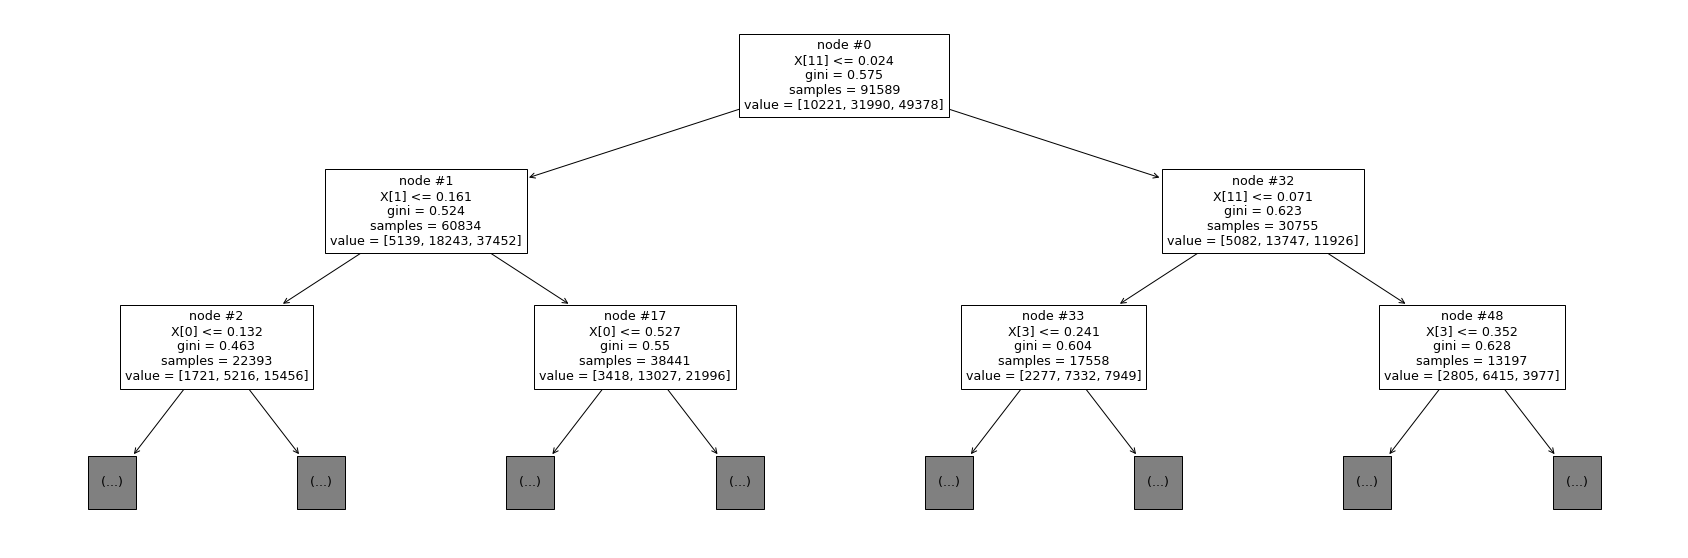

In [14]:
plt.figure(figsize=(30, 10))
plot_tree(tree, max_depth=2, node_ids=True)
plt.savefig('tree_class.jpg')

##### create random forest and train it

In [15]:
forest = RandomForestClassifier(n_estimators=200, max_depth=5)
forest.fit(diab_attr_train, diab_trg_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

##### check the score with train set

In [16]:
forest.score(diab_attr_train, diab_trg_train)

0.5391258775617159

##### check the score with test set

In [17]:
forest.score(diab_attr_test, diab_trg_test)

0.5390586616881202

##### AdaBoost

In [18]:
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=20)
ada_boost.fit(diab_attr_train, diab_trg_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=20)

##### check the score with train set

In [19]:
ada_boost.score(diab_attr_train, diab_trg_train)

0.5898524932033323

##### check the score with test set

In [20]:
ada_boost.score(diab_attr_test, diab_trg_test)

0.5859290557138646